<a href="https://colab.research.google.com/github/sidh2002/-Data-Science-Project-1-/blob/main/BREAST_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BREAST CANCER PREDICTION

## DATA PREPROCESSING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
file_path = "/content/data.csv"
df = pd.read_csv(file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# If there are missing values, handle them (e.g., impute or drop)
# Example: df = df.dropna()


In [14]:


# Drop unnecessary columns
df.drop(columns=['id'], inplace=True)


# Example: df = df.dropna()

# Handle outliers
from scipy import stats

# Select only numeric columns for Z-score calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = stats.zscore(df[numeric_columns])

# Create a DataFrame with Z-scores
df_z_scores = pd.DataFrame(z_scores, columns=numeric_columns)

# Use Z-scores to filter out outliers
outlier_mask = (np.abs(df_z_scores) < 3).all(axis=1)
df_no_outliers = df[outlier_mask]

# Continue with the rest of your preprocessing steps and feature engineering...


In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
x=df.drop(columns=['diagnosis'])
y=df['diagnosis']


In [17]:
y


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## DATA SCALLING

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

# ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.9, shuffle=True, random_state=42)
x_train.shape

(512, 30)

# MODEL STRUCTURE

In [23]:
model = Sequential([
    Dense(16, activation='relu', input_dim=30),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TRAINING

In [24]:
history=model.fit(x_train,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
13/13 [==============================] - 2s 23ms/step - loss: 0.6923 - accuracy: 0.6235 - val_loss: 0.6924 - val_accuracy: 0.6019
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.6235 - val_loss: 0.6830 - val_accuracy: 0.6019
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.6235 - val_loss: 0.6732 - val_accuracy: 0.6019
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.6612 - accuracy: 0.6259 - val_loss: 0.6594 - val_accuracy: 0.6019
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.6405 - accuracy: 0.6479 - val_loss: 0.6314 - val_accuracy: 0.6796
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.6112 - accuracy: 0.8386 - val_loss: 0.6009 - val_accuracy: 0.8155
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5790 - accuracy: 0.8557 - val_loss: 0.5695 - val_accuracy: 0.8058
Epoch 8/150


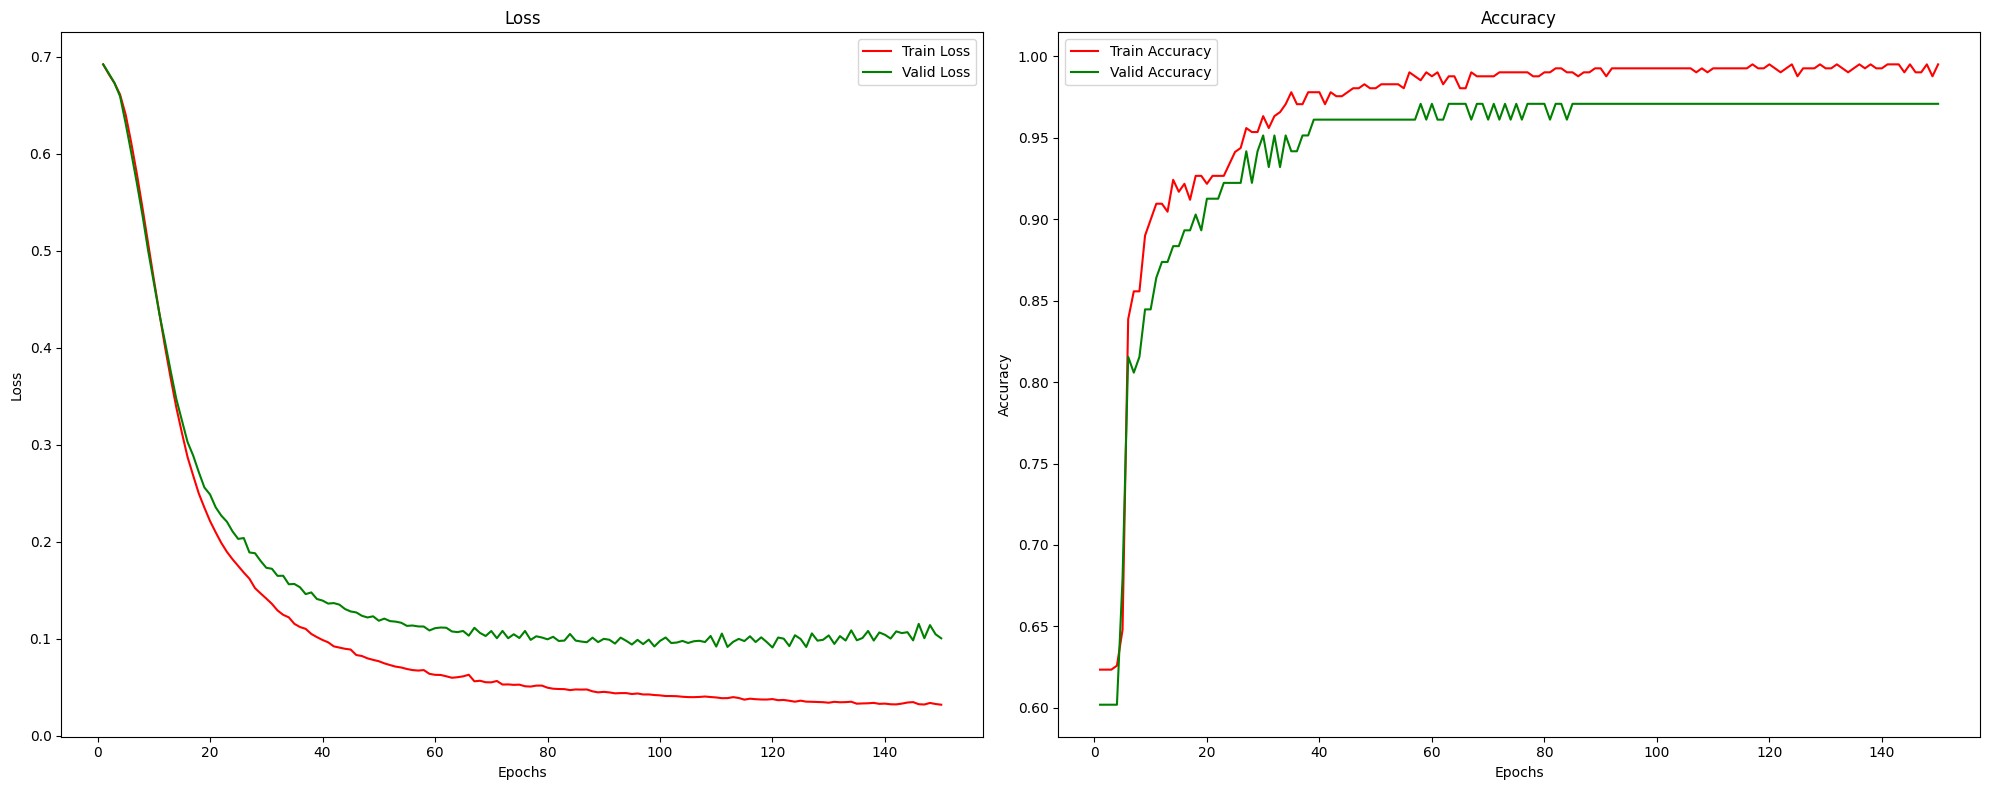

In [25]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# FEATURE SELECTION TO IMPLEMENT SVM

In [30]:
# Print column names to verify the columns in the DataFrame
print(df_copy.columns)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [31]:
# Separate features and target variable
X = df_copy.drop(['diagnosis'], axis=1)  # Exclude 'diagnosis' from features
y = df_copy['diagnosis']

# Feature selection using SelectKBest with ANOVA F-statistic
k_best = SelectKBest(f_classif, k=10)  # Select top 10 features (you can adjust 'k' as needed)
X_selected = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Create a DataFrame with the selected features
df_selected_features = df_copy.iloc[:, selected_indices]
df_selected_features['diagnosis'] = y  # Add the target variable back

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_selected_features.drop('diagnosis', axis=1),
    df_selected_features['diagnosis'],
    test_size=0.2,
    random_state=42
)

# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9649122807017544
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<ipython-input-31-8930991144e2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['diagnosis'] = y  # Add the target variable back


Data Preprocessing Documentation:
Objective:
Clean and preprocess the Breast Cancer Wisconsin (Diagnostic) dataset, ensuring it is ready for feature selection and machine learning model implementation.

Steps:

Load Dataset:

Loaded the dataset using Pandas.
Handle Missing Values:

Checked for missing values in the dataset.
If present, handled them using appropriate methods (e.g., dropping rows or imputing values).
Handle Outliers:

Identified outliers using Z-score and removed them to ensure the quality of the data.
Data Cleaning and Inconsistencies:

Checked for inconsistencies in the data and applied necessary cleaning procedures.
Drop Unnecessary Columns:

Dropped the 'id' column as it is not relevant for the analysis.
Feature Selection Documentation:
Objective:
Identify relevant features for breast cancer prediction and apply feature engineering techniques.

Steps:

Correlation Analysis:

Explored the correlation between features and the target variable ('diagnosis').
Selected top features based on their correlation with the target variable.
Feature Engineering:

Created new features or applied transformations to enhance the predictive model's performance.
Machine Learning Model (SVM) Documentation:
Objective:
Implement a Support Vector Machine (SVM) model for classifying tumors into malignant or benign.

Steps:

Label Encoding:

Encoded the 'diagnosis' column using Label Encoding to convert categorical data into numeric format.
Feature Selection (ANOVA F-statistic):

Applied SelectKBest with ANOVA F-statistic to select the top features for the model.
Model Training:

Split the data into training and testing sets.
Initialized and trained the SVM model with a linear kernel.
Model Evaluation:

Made predictions on the test set.
Evaluated the model using accuracy, confusion matrix, and classification report.
Model Performance Metrics Explanation:
Accuracy:
The accuracy metric represents the proportion of correctly classified instances among all instances. It gives an overall assessment of the model's correctness.

Confusion Matrix:
A confusion matrix provides information about the true positive, true negative, false positive, and false negative predictions. It helps in understanding the model's performance on each class.

Classification Report:
The classification report includes precision, recall, and F1-score for each class. Precision is the ratio of true positives to the total predicted positives, recall is the ratio of true positives to the total actual positives, and the F1-score is the harmonic mean of precision and recall. It provides insights into the model's performance on individual classes.

Challenges Faced:
Data Quality:

Ensuring the dataset's quality by handling missing values and outliers was a challenge. Decisions were made to drop or impute values based on the nature of the missing data.
Feature Engineering:

Determining the most effective feature engineering techniques to improve model performance required experimentation and analysis.
Model Selection:

Choosing the appropriate machine learning model involved considerations of the dataset's characteristics and the problem at hand. SVM was chosen for its ability to handle non-linear relationships.
Interpretability:

SVM models might be less interpretable than simpler models. Efforts were made to provide explanations for the model's decisions using performance metrics and feature importance.**bold text**